# Netflix Data Analysis

This notebook explores a dataset of Netflix titles, performing data loading, cleaning, feature engineering, and visualization to gain insights into the content available on the platform.

# Loading Data
We'll start by loading the Netflix titles dataset into a pandas DataFrame

In [65]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

# Feature Engineering
 We'll create new features from the existing data to provide more context and insights for our analysis. This includes calculating title and description lengths, determining the decade of release, and identifying titles/descriptions containing specific keywords

In [66]:
df['title_length']=df['title'].str.len() # Calculate the length of the 'title' column and store it in a new column 'title_length'

Calculating the length of the title will help us explore if there's a relationship between title length and other factors like rating or type

In [67]:
df['description_length']=df['description'].str.len() # Calculate the length of the 'description' column and store it in a new column 'description_length'

In [68]:
df['decade_of_release']= (df['release_year']//10)*10 # Create a new column 'decade_of_release' by dividing 'release_year' by 10, taking the integer part, and multiplying by 10

In [69]:
df['has_description']=df['description'].notnull() # Create a boolean column 'has_description' indicating if the 'description' is not null

In [70]:
df['has_theme']= df['title'].str.contains('love|death|war',case=False,na=False) # Create a boolean column 'has_theme' indicating if 'title' contains 'love', 'death', or 'war' (case-insensitive)

In [71]:
df['description_word_count'] = df['description'].str.split().apply(len)

# Cleaning
We'll clean the data by handling missing values and ensuring data types are appropriate for analysis



In [72]:
df = df.dropna(subset=['title','release_year']) # Drop rows with missing values in the 'title' and 'release_year' column

In [73]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce') # Convert the 'date_added' column to datetime format

Converting 'date_added' to datetime objects will allow us to perform time-based analysis

In [74]:
df['date_added'].isna().sum() # Count the number of missing values in the 'date_added' column

np.int64(98)

## Visualizations

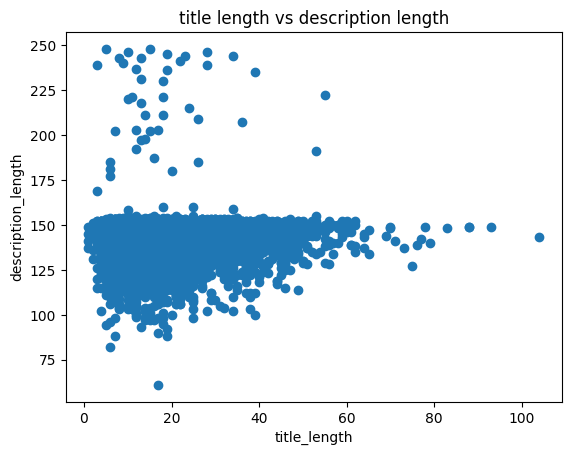

In [80]:
import matplotlib.pyplot as plt
# Create a scatter plot of 'title_length' vs 'description_length'
plt.scatter(df['title_length'],df['description_length'])
plt.xlabel('title_length')
plt.ylabel('description_length')
plt.title('title length vs description length')
plt.show()

This scatter plot shows the relationship between the length of the title and the length of the description. We can observe if there's any clear pattern or correlation.

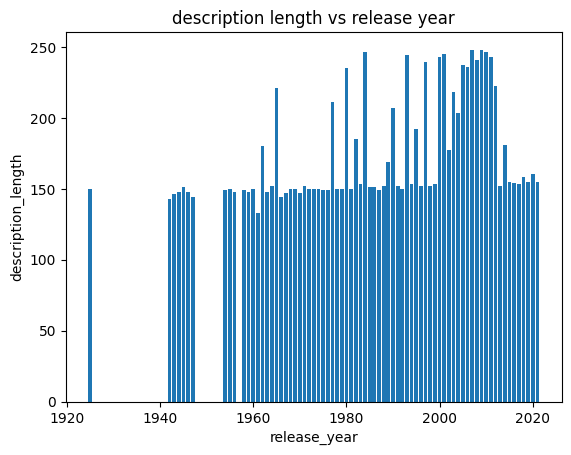

In [81]:
# Create a bar plot of 'release_year' vs 'description_length'
plt.bar(df['release_year'],df['description_length'])
plt.xlabel('release_year')
plt.ylabel('description_length')
plt.title('description length vs release year')
plt.show()

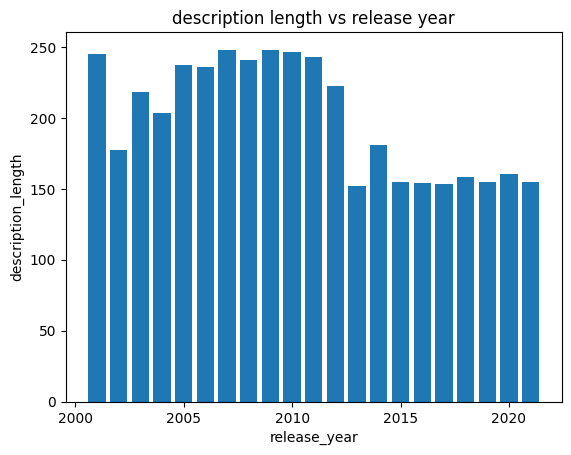

In [82]:
# Filter the DataFrame to include only rows where 'release_year' is greater than 2000
filtered = df[df['release_year']>2000]
# Create a bar plot of 'release_year' vs 'description_length' for the filtered data
plt.bar(filtered['release_year'],filtered['description_length'])
plt.xlabel('release_year')
plt.ylabel('description_length')
plt.title('description length vs release year')
plt.show()

<Axes: xlabel='country'>

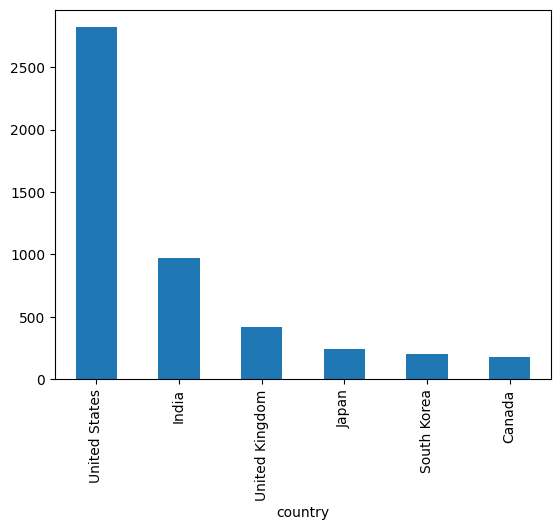

In [83]:
# Count the occurrences of each country, show the top 6, and plot as a bar chart
df['country'].value_counts().head(6).plot(kind='bar')

This bar chart displays the top 6 countries with the highest number of Netflix titles, giving us an idea of the major content producers on the platform. which netflix might want to support

<Axes: xlabel='decade_of_release', ylabel='number of shows/movies'>

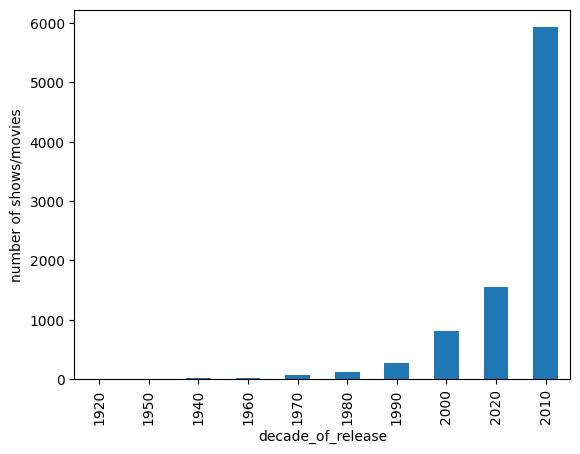

In [85]:
df['decade_of_release'].value_counts().sort_values().plot(kind='bar', xlabel='decade_of_release', ylabel='number of shows/movies')
# Count occurrences of each decade, sort, and plot as a bar chart with labels

<Axes: xlabel='type'>

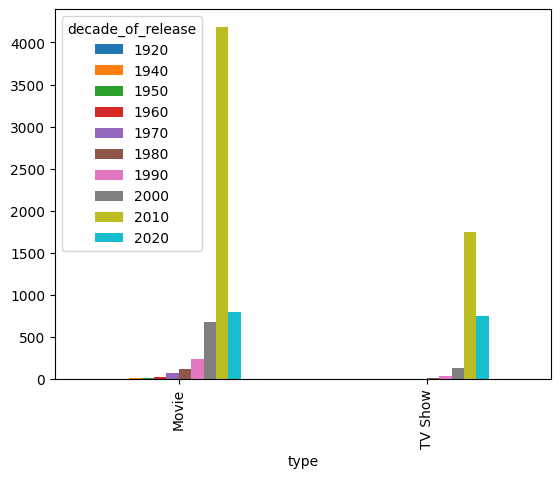

In [86]:
df.groupby('type')['decade_of_release'].value_counts().unstack().plot(kind='bar') # Group by 'type' and 'decade_of_release', unstack, and plot as a bar chart

<Axes: xlabel='decade_of_release'>

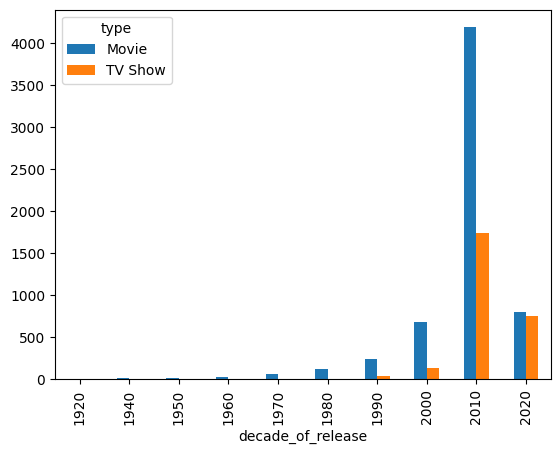

In [87]:
pd.pivot_table(df,index='decade_of_release',columns='type',values='title_length',aggfunc='count').plot(kind='bar') # Create a pivot table with 'decade_of_release' as index, 'type' as columns, counting 'title_length', and plot as a bar chart

<Axes: xlabel='decade_of_release'>

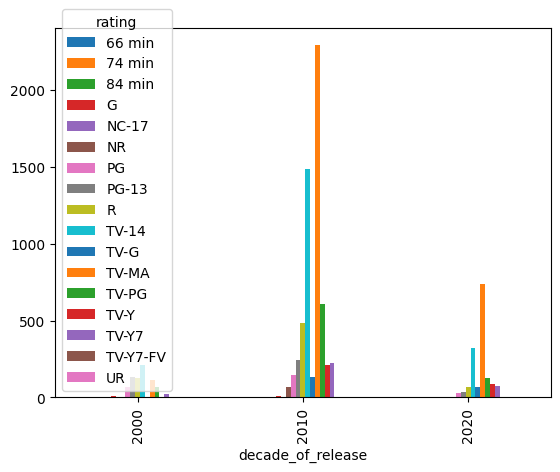

In [88]:
# Filter the DataFrame for release years after 2000
filtered = df[df['release_year']>2000]
# Create a pivot table for the filtered data with 'decade_of_release' as index, 'rating' as columns, counting 'type', and plot as a bar chart
pd.pivot_table(filtered,index='decade_of_release',columns='rating',values='type',aggfunc='count').plot(kind='bar')

<Axes: ylabel='count'>

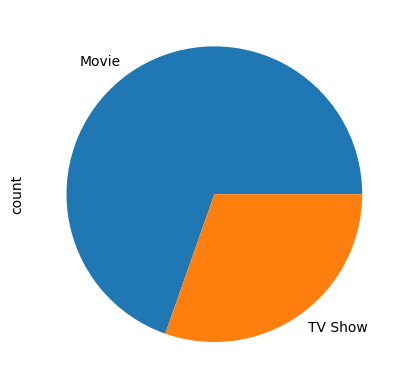

In [99]:
df['type'].value_counts().plot(kind='pie') #from this pie figure we can see that the majority of work are Movies

<Axes: xlabel='country'>

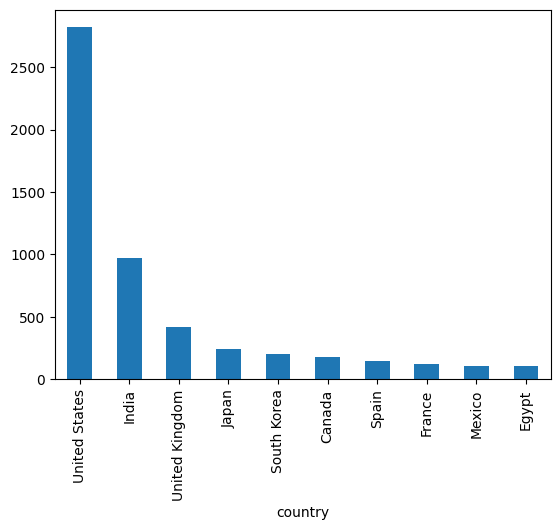

In [101]:
df['country'].value_counts().head(10).plot(kind='bar') #this figure shows the number of work done by each top 10 countries

<Axes: xlabel='type'>

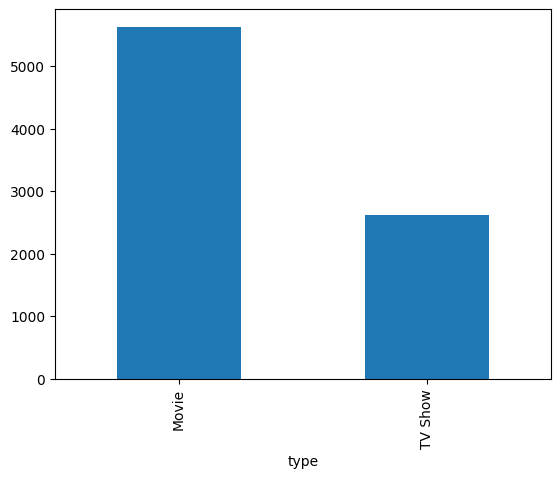

In [100]:
df[df['release_year'] > 2000]['type'].value_counts().plot(kind='bar') #this displays the number of movies vs tv shows

<Axes: ylabel='count'>

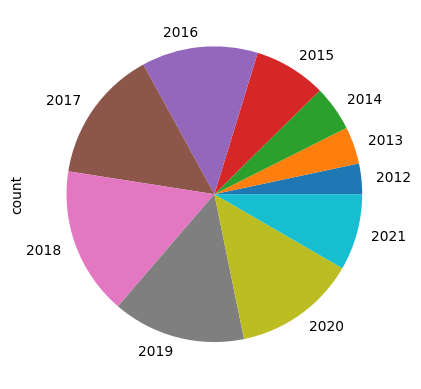

In [104]:
df[df['release_year']>2011]['release_year'].value_counts().sort_index().plot(kind='pie') #Visualize the distribution of titles released after 2011 by release year using a pie chart

<Axes: ylabel='count'>

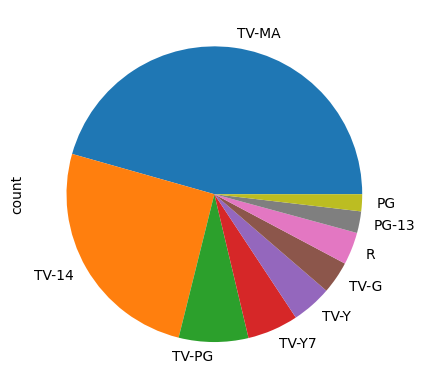

In [110]:
df[(df['release_year'] > 2020)]['rating'].value_counts().plot(kind='pie') #Calculate and sort the average description word count by rating

<Axes: xlabel='release_year'>

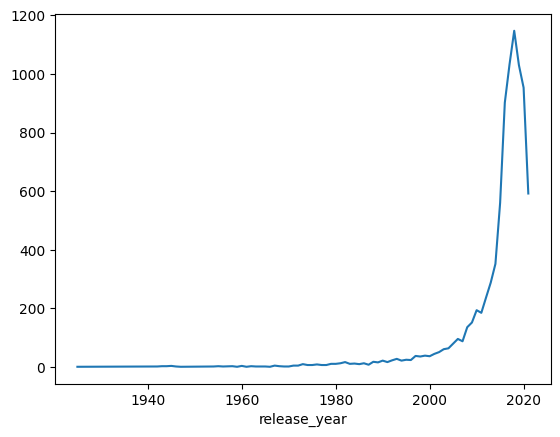

In [126]:
df['release_year'].value_counts().sort_index().plot(kind='line') #this will result in a figure in which we realise that the film/shows production peaked prior to 2020

<Axes: xlabel='release_year'>

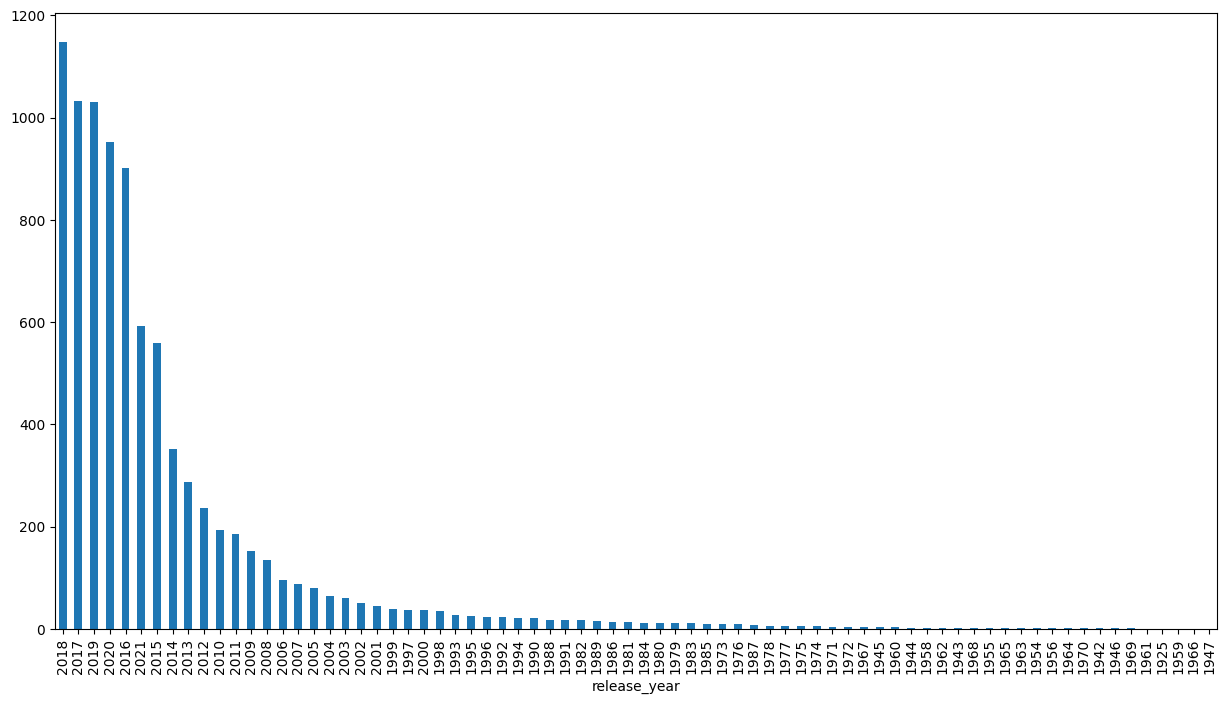

In [119]:
df['release_year'].value_counts().plot(kind='bar',figsize=(15,8)) # in this bar chart we notice that most of the work was released in 2018

In [79]:
display(df.loc[df['title_length'].idxmax()]) # Display the row with the maximum 'title_length'
df.loc[df['title_length'].idxmin()] # Display the row with the minimum 'title_length'

,5164
show_id,s5165
type,Movie
title,Jim & Andy: The Great Beyond - Featuring a Ver...
director,Chris Smith
cast,Jim Carrey
country,"Canada, United States"
date_added,2017-11-17 00:00:00
release_year,2017
rating,TV-MA
duration,94 min


,2069
show_id,s2070
type,TV Show
title,H
director,NaN
cast,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe..."
country,France
date_added,2020-09-01 00:00:00
release_year,2002
rating,TV-MA
duration,4 Seasons


In [78]:
df.groupby('rating')['description_length'].max().sort_values(ascending=False).head(1) # Group by 'rating', find the maximum 'description_length' for each rating, sort in descending order, and show the top 1

,description_length
rating,
TV-PG,248


In [77]:
df.groupby('type')['description_length'].mean() # Group the DataFrame by 'type' and calculate the mean of 'description_length' for each type

,description_length
type,
Movie,143.615723
TV Show,142.587444


In [75]:
df['has_description'].value_counts() # Count the occurrences of True and False in the 'has_description' column

,count
has_description,
True,8807


In [76]:
df['decade_of_release'].value_counts().head(1) # Count the occurrences of each decade in 'decade_of_release' and display the top 1

,count
decade_of_release,
2010,5927


In [84]:
df.groupby('type')['title_length'].mean() # Group by 'type' and calculate the mean of 'title_length' for each type

,title_length
type,
Movie,18.029033
TV Show,17.031016


In [93]:
df[(df['country']=='India') & (df['type']=='TV Show')]  #this displays the tv shows made by India

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,12,152,2020,True,False,24
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",12,146,2020,True,False,22
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",13,126,2010,True,False,21
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,29,129,2010,True,False,19
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,30,129,2010,True,False,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,NaN,NaN,India,2019-05-25,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,9,148,2010,True,False,21
8235,s8236,TV Show,The Calling,Bumpy,NaN,India,2019-04-01,2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,11,136,2010,True,False,18
8321,s8322,TV Show,The Golden Years with Javed Akhtar,NaN,NaN,India,2017-06-01,2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",34,143,2010,True,False,22
8349,s8350,TV Show,The House That Made Me,NaN,Vinay Pathak,India,2017-03-31,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",22,148,2010,True,False,24


In [94]:
df[(df['country']=='India') & (df['type']=='TV Show')].shape[0] #this displays the number of tv shows made by India

79

In [95]:
df['rating'].value_counts() #this gives us the number of movies/shows made in each rating

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [96]:
df['description'].str.split().apply(len).mean() #this displays the mean length of the descriptions

np.float64(23.882252753491542)

In [97]:
df[['type','release_year']].value_counts() #this displays the number of movies in each year and tv shows in each year

type     release_year
Movie    2017            767
         2018            767
         2016            658
         2019            633
         2020            517
                        ... 
TV Show  1946              1
         1977              1
         1974              1
         1967              1
         1991              1
Name: count, Length: 119, dtype: int64

In [98]:
df.groupby(['release_year','type']).size() #this displays the number of movies in each year and tv shows in each year

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          Movie      277
              TV Show    315
Length: 119, dtype: int64

In [102]:
df.groupby(['release_year', 'country']).size() #This displays how many movies or TV shows were released in a specific year in a particular country

release_year  country                      
1942          United States                    2
1943          United States                    3
1944          United States                    2
              United States, United Kingdom    1
1945          United States                    4
                                              ..
2021          United States, Mexico            1
              United States, Singapore         1
              United States, United Kingdom    4
              Uruguay, Germany                 1
              Vietnam                          1
Length: 1754, dtype: int64

In [103]:
df['release_year'].value_counts().sort_index() #this displays the number of work done in each year in an ascending order

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


In [105]:
df[(df['type']=='Movie') & (df['release_year']==2019)].value_counts() #Count movies released in 2019

,,,,,,,,,,,,,,,,,,count
show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count,
s975,Movie,Ram Prasad Ki Tehrvi,Seema Pahwa,"Supriya Pathak, Parambrata Chatterjee, Konkona Sen Sharma, Vikrant Massey, Manoj Pahwa, Vinay Pathak, Ninad Kamat, Naseeruddin Shah",India,2021-04-24,2019,TV-14,113 min,"Dramas, Independent Movies, International Movies","Conflicts, complications and confrontations make for an emotional and eventful affair when a multigenerational family reunites in Lucknow.",20,138,2010,True,False,18,1
s1047,Movie,Only Mine,Michael Civille,"Amber Midthunder, Brett Zimmerman, Chris Browning, Walter Fauntleroy, Claudia Ferri, Lorenzo James Henrie, Ellen Wroe, Ashley Holliday Tavares, Nancy Linehan Charles, Jonna Walsh",United States,2021-04-15,2019,TV-14,88 min,Thrillers,"After dating a charming cop who turns into an obsessive stalker, a small-town girl must save herself from his deadly ways.",9,122,2010,True,False,21,1
s1107,Movie,Cross: Rise of the Villains,"Patrick Durham, Paul G. Volk","Brian Austin Green, Vinnie Jones, Lori Heuring, Richard Grieco, Patrick Durham, Tim Abell, Carson Lee Bradshaw, Manu Intiraymi, Danny Trejo",United States,2021-04-02,2019,R,100 min,Action & Adventure,"Armed with a mighty ancient amulet, a team of weapons experts joins forces to defend Los Angeles from supervillains with explosive powers of their own.",27,151,2010,True,False,25,1
s1138,Movie,The Knight and the Princess,Bashir El Deek,"Sedky Sakhr, Hashem El Garhy, Shahira Kamal, Aiemzy, Hani R. Eskander, Saif Abu-Kandil","Egypt, Saudi Arabia",2021-04-01,2019,TV-PG,96 min,"Action & Adventure, International Movies, Music & Musicals","A fictional account of the heroic quests of a 7th-century knight, from rescuing hostages abducted by pirates in the Indian Sea to taking on a tyrant.",27,149,2010,True,False,26,1
s1254,Movie,LEGO Marvel Spider-Man: Vexed by Venom,"Andrew Duncan, Ken Cunningham","Robbie Daymond, Ben Pronsky, Josh Keaton, Tara Strong, Jennifer Hale, Laura Bailey",United States,2021-03-01,2019,TV-Y,22 min,"Children & Family Movies, Comedies","When Green Goblin and Venom team up for a disastrous scheme, Spider-Man calls in a wall-crawling ally and must rely on his Spidey senses to stop them.",38,150,2010,True,False,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s1568,Movie,The Panti Sisters,Jun Lana,"Paolo Ballesteros, Martin del Rosario, Christian Bables, John Arcilla, Carmi Martin, Rosanna Roces, Joross Gamboa, Via Antonio, Roxanne Barcelo",Philippines,2020-12-10,2019,TV-MA,108 min,"Comedies, International Movies, LGBTQ Movies",Three gay siblings are told by their terminally ill father that they must each produce a grandchild in order to inherit their share of his fortune.,17,147,2010,True,False,26,1
s1550,Movie,The Professor and the Madman,Farhad Safinia,"Mel Gibson, Sean Penn, Natalie Dormer, Eddie Marsan, Steve Coogan, Stephen Dillane, Ioan Gruffudd, Jennifer Ehle, Jeremy Irvine, David O'Hara, Anthony Andrews","Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong",2020-12-15,2019,TV-14,125 min,"Dramas, Independent Movies","While working on the first Oxford English Dictionary, a scholar receives thousands of entries from a doctor with a lengthy vocabulary and dark secrets.",28,151,2010,True,False,24,1
s1530,Movie,Sakaling Maging Tayo,JP Habac,"McCoy De Leon, Elisse Joson, Bembol Roco, Chai Fonacier, Paulo Angeles, Markus Paterson, Milo Elmido Jr.",Philippines,2020-12-17,2019,TV-14,90 min,"International Movies, Romantic Movies","A college student seizes his chance with a crush when an unexpected encounter turns into a night of bold dares, deep confessions and possible romance.",20,150,2010,True,False,25,1


In [106]:
df[(df['title'].str.contains('love') & (df['release_year']< 2015))] #Filter for titles with 'love' in the description released before 2015

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
5712,s5713,Movie,Donald Glover: Weirdo,"Shannon Hartman, Michelle Caputo",Donald Glover,United States,2016-11-19,2012,TV-MA,65 min,Stand-Up Comedy,Fearlessly funny stand-up comic and sitcom sta...,21,147,2010,True,True,27
6503,s6504,Movie,Cloverfield,Matt Reeves,"Lizzy Caplan, Jessica Lucas, T.J. Miller, Mich...",United States,2020-01-01,2008,PG-13,85 min,"Action & Adventure, Horror Movies, Sci-Fi & Fa...",A going-away party in Manhattan is interrupted...,11,129,2000,True,True,21


In [107]:
df[(df['rating'] == 'PG-13') & (df['country'] == 'United States')] #Filter for titles with 'PG-13' rating from the United States

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",20,152,2020,True,False,27
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,12,151,2020,True,False,29
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,9,150,2010,True,False,26
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,10,143,2010,True,False,24
44,s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,2021-09-16,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody...",17,149,1980,True,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,s8758,Movie,World Trade Center,Oliver Stone,"Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...",United States,2019-11-20,2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ...",18,147,2000,True,False,21
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,2020-01-01,1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,10,150,1990,True,False,26
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,2019-01-01,2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...,3,149,2000,True,False,22
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,2019-01-01,2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i...",23,144,2000,True,False,20


In [108]:
df['country'].value_counts().sort_values(ascending=True) #Count titles by country in ascending order

,count
country,
"United Kingdom, United States, Germany, Denmark, Belgium, Japan",1
"Argentina, United States, Mexico",1
"Finland, Germany, Belgium",1
"Canada, Norway",1
"Mexico, United States, Spain, Colombia",1
...,...
South Korea,199
Japan,245
United Kingdom,419


In [109]:
df.groupby('rating')['description_word_count'].mean().sort_values(ascending=False) # Calculate and sort the average description word count by rating

,description_word_count
rating,
G,25.024390
PG,24.606272
TV-Y7,24.422156
R,24.337922
TV-Y7-FV,24.333333
NC-17,24.333333
PG-13,24.067347
TV-Y,24.045603
TV-14,23.834722


In [111]:
df #this gives us the whole data frame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",20,152,2020,True,False,27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",13,147,2020,True,False,27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,146,2020,True,False,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",21,147,2020,True,False,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,12,152,2020,True,False,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",6,150,2000,True,False,25
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",11,120,2010,True,False,20
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,10,137,2000,True,False,25
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",4,149,2000,True,False,26


In [112]:
df.info() # This prints information about the DataFrame, including datatypes, non-null values and columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   show_id                 8807 non-null   object        
 1   type                    8807 non-null   object        
 2   title                   8807 non-null   object        
 3   director                6173 non-null   object        
 4   cast                    7982 non-null   object        
 5   country                 7976 non-null   object        
 6   date_added              8709 non-null   datetime64[ns]
 7   release_year            8807 non-null   int64         
 8   rating                  8803 non-null   object        
 9   duration                8804 non-null   object        
 10  listed_in               8807 non-null   object        
 11  description             8807 non-null   object        
 12  title_length            8807 non-null   int64   

In [113]:
df.describe() #this describes the release year data

,date_added,release_year,title_length,description_length,decade_of_release,description_word_count
count,8709,8807.000000,8807.000000,8807.000000,8807.000000,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198,17.725786,143.303281,2009.108664,23.882253
min,2008-01-01 00:00:00,1925.000000,1.000000,61.000000,1920.000000,10.000000
25%,2018-04-20 00:00:00,2013.000000,10.000000,140.000000,2010.000000,22.000000
50%,2019-07-12 00:00:00,2017.000000,15.000000,146.000000,2010.000000,24.000000
75%,2020-08-26 00:00:00,2019.000000,23.000000,149.000000,2010.000000,26.000000
max,2021-09-25 00:00:00,2021.000000,104.000000,248.000000,2020.000000,48.000000
std,NaN,8.819312,10.630855,10.334959,9.228119,2.836704


In [114]:
df[(df['country'] == 'United States') & (df['release_year'] > 2010)] #this shows the work done after 2010 by the USA


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",20,152,2020,True,False,27
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,12,151,2020,True,False,29
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,17,148,2020,True,False,25
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,10,143,2010,True,False,24
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,38,152,2020,True,False,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,s8761,Movie,Would You Rather,David Guy Levy,"Brittany Snow, Jeffrey Combs, Jonny Coyne, Law...",United States,2019-06-05,2013,TV-MA,93 min,"Horror Movies, Independent Movies, Thrillers","In need of cash to help her sick brother, a yo...",16,150,2010,True,False,27
8780,s8781,TV Show,Yo-Kai Watch,NaN,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",Nate frees a mythical being trapped in a magic...,12,149,2010,True,False,24
8782,s8783,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,2016-12-02,2016,PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...,11,144,2010,True,False,26
8787,s8788,Movie,You Can’t Fight Christmas,Kenny Young,"Brely Evans, Andra Fuller, Persia White, Porsc...",United States,2017-12-19,2017,TV-PG,85 min,"Comedies, Romantic Movies",After stepping in to revitalize his family's h...,25,139,2010,True,False,18


In [137]:
df[(df['country'] == 'United States') & (df['release_year'] > 2010)].shape[0] #this shows the number of work done after 2010 by the USA

2246

In [115]:
df['type'].value_counts() #this shows the number of work in each type

,count
type,
Movie,6131
TV Show,2676


In [117]:
df['release_year'].value_counts() # this will give us the number of movies/tv shows per year

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


In [118]:
df['director'].value_counts().head(3) #this will give us the top 3 directors based on the number of movies/tv shows

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16


In [121]:
df[df['country']=='United Kingdom'].shape[0] #this gives the number of movies/shows made by the UK

419

In [122]:
df[df['title'].str.contains('love')].shape[0] #this will show the number of titles that contains the word 'love'

8

In [123]:
df[df['country']=='India'] #this will result in all of india's movies/shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,12,152,2020,True,False,24
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,5,148,1990,True,False,29
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",12,146,2020,True,False,22
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",13,126,2010,True,False,21
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,29,129,2010,True,False,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,19,236,2000,True,False,38
8775,s8776,TV Show,Yeh Meri Family,NaN,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",15,114,2010,True,False,18
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,8,151,2010,True,False,19
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,5,120,2000,True,False,20


In [124]:
df['country'].value_counts().head(10) #this gives the top 10 produceres in which USA leads

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [127]:
df.head() #this gives us the first five in our Dataframe

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",20,152,2020,True,False,27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",13,147,2020,True,False,27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,146,2020,True,False,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",21,147,2020,True,False,24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,12,152,2020,True,False,24


In [128]:
df.loc[(df['country']=='United States') | (df['country']=='India')].shape[0] # this gives us the number of movies/tv shows in india or USA

3790

In [135]:
df[df['director'].str.contains('James', na=False)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_length,description_length,decade_of_release,has_description,has_theme,description_word_count
314,s315,Movie,Heavy,James Mangold,"Pruitt Taylor Vince, Shelley Winters, Liv Tyle...",United States,2021-08-03,1995,R,104 min,"Dramas, Independent Movies, Romantic Movies",Overweight Victor hides from the world making ...,5,138,1990,True,False,23
802,s803,Movie,Ninja Assassin,James McTeigue,"Rain, Naomie Harris, Ben Miles, Rick Yune, Shô...","Germany, United States, France",2021-06-02,2009,R,99 min,Action & Adventure,A former assassin must protect himself and a E...,14,122,2000,True,False,22
867,s868,Movie,The Last Days,James Moll,NaN,United States,2021-05-19,1998,PG-13,87 min,Documentaries,This Oscar-winning documentary recounts the ha...,13,145,1990,True,False,21
870,s871,Movie,Amy Tan: Unintended Memoir,James Redford,Amy Tan,United States,2021-05-18,2021,TV-14,101 min,Documentaries,From her painful past to her successful career...,26,146,2020,True,False,24
1015,s1016,Movie,American Me,Edward James Olmos,"Edward James Olmos, William Forsythe, Pepe Ser...",United States,2021-04-17,1992,R,126 min,Dramas,Three friends born in poverty create their own...,11,150,1990,True,False,25
1118,s1119,Movie,Insidious,James Wan,"Patrick Wilson, Rose Byrne, Lin Shaye, Ty Simp...","United States, Canada",2021-04-01,2010,PG-13,103 min,"Horror Movies, Thrillers","A family moves into a new home, where their so...",9,151,2010,True,False,29
1187,s1188,Movie,Deadly Illusions,Anna Elizabeth James,"Kristin Davis, Dermot Mulroney, Greer Grammer,...",United States,2021-03-18,2021,R,115 min,Thrillers,After a bestselling novelist suffering from wr...,16,147,2020,True,False,24
1283,s1284,Movie,The Conjuring,James Wan,"Vera Farmiga, Patrick Wilson, Lili Taylor, Ron...",United States,2021-02-21,2013,R,112 min,"Horror Movies, Thrillers",When a family starts experiencing supernatural...,13,151,2010,True,False,24
1284,s1285,Movie,The Conjuring 2,James Wan,"Patrick Wilson, Vera Farmiga, Madison Wolfe, F...","Canada, United States, United Kingdom",2021-02-21,2016,R,134 min,Horror Movies,After her daughter unwittingly releases a male...,15,150,2010,True,False,24
1415,s1416,Movie,An Imperfect Murder,James Toback,"Sienna Miller, Alec Baldwin, Charles Grodin, C...",United States,2021-01-13,2017,R,71 min,"Dramas, Thrillers",Haunted by a nightmare involving her abusive e...,19,137,2010,True,False,21


# Summary of Findings

Based on this analysis, we found that:

*   The majority of Netflix content consists of movies, which could be a focus for their advertising campaigns.
*   The number of Netflix titles released annually has shown a generally increasing trend over the years, with a peak around 2018.
*   A significant number of titles feature dramatic themes, as indicated by the presence of words like 'love,' 'war,' or 'death' in their descriptions.
*   The production volume from the United States since 2010 alone surpasses the total production volume of any other single country in the dataset.



